In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
%cd ..

C:\Users\Christopher\Documents\Christopher\College hey\Rice\COMP 549 - Capstone


In [42]:
DATA_PATH = 'data/20220521 Terns 10k/'
NEW_DATA_PATH = 'data/terns/'
DATA_FILES = [file[:-4] for file in filter(lambda x: x.endswith('.jpg'), os.listdir(DATA_PATH))]

In [125]:
# Collect all birds marked in bbx file
from PIL import Image 
from utils import plotting
from utils.cropping import csv_to_dict
import os
import random
import csv

for file in DATA_FILES:
    print(file)
    annot_dict = csv_to_dict(csv_path = DATA_PATH + file + '.bbx', annot_file_ext='bbx')
    image_file = DATA_PATH + file + '.jpg'

    #Load the image
    image = np.asarray(Image.open(image_file))

    # Slice the image around each bounding box
    bird_images = []
    for bird in annot_dict['bbox']:
        img_dict = {}
        img_dict['class'] = bird['class']
        img_dict['desc'] = bird['desc']
        img_dict['bbx'] = [bird['xmin'], bird['ymin'],bird['xmax'], bird['ymax']]
        img_dict['midpt'] = []
        img_dict['mrk'] = []
        img_dict['orig_file'] = file
        img_dict['img'] = image[bird['ymin']:bird['ymax'], bird['xmin']:bird['xmax']]
        bird_images.append(img_dict)
        
    # Adding marks to each bird with a mark within its bounding box
    mrx = pd.read_csv(DATA_PATH + file + '.mrx')

    for bird in bird_images:
        bbx = bird['bbx']
        for index, mrk in mrx.iterrows():
            if (bbx[0] <= mrk.X <= bbx[2]) and (bbx[1] <= mrk.Y <= bbx[3]):
                bird['mrk'].append((mrk['Class'], mrk.Desc))
                bird['midpt'].extend([mrk['X'], mrk['Y']])
                
    # Write data to a csv and save images to a local directory
    bird_images = list(filter(lambda x: bool(x['mrk']), bird_images))
    with open(NEW_DATA_PATH + file + '_labels.csv', mode='w', newline='') as annot:
        csv.writer(annot).writerow(['filename', 'old_class', 'new_class', 'new_desc', 'xmin', 'ymin', 'xmax', 'ymax', 'mrk_X', 'mrk_Y'])
        for i in range(len(bird_images)):
            annot_writer = csv.writer(annot)
            annot_writer.writerow([file + '_' + str(i),
                                   bird_images[i]['class'],
                                   bird_images[i]['mrk'][0][0],
                                   bird_images[i]['mrk'][0][1],
                                   bird_images[i]['bbx'][0],
                                   bird_images[i]['bbx'][1],
                                   bird_images[i]['bbx'][2],
                                   bird_images[i]['bbx'][3], 
                                   bird_images[i]['midpt'][0], 
                                   bird_images[i]['midpt'][1]])
            img = Image.fromarray(bird_images[i]['img']).save(NEW_DATA_PATH + file + '_' + str(i) + '.jpg')
    # break
            

20220521 - Chester Island 10k-03-13


C:\Users\Christopher\anaconda3\envs\Audubon\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


20220521 - Chester Island 10k-03-14


C:\Users\Christopher\anaconda3\envs\Audubon\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


20220521 - Chester Island 10k-04-12


C:\Users\Christopher\anaconda3\envs\Audubon\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


20220521 - Chester Island 10k-04-13


C:\Users\Christopher\anaconda3\envs\Audubon\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


20220521 - Chester Island 10k-04-14


C:\Users\Christopher\anaconda3\envs\Audubon\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


20220521 - Chester Island 10k-05-09


FileNotFoundError: [Errno 2] No such file or directory: 'data/20220521 Terns 10k/20220521 - Chester Island 10k-05-09.bbx'

In [127]:
DATA_FILES[6:]

['20220521 - Chester Island 10k-05-10',
 '20220521 - Chester Island 10k-05-11',
 '20220521 - Chester Island 10k-05-12',
 '20220521 - Chester Island 10k-05-13']

In [128]:
# Continuing script
for file in DATA_FILES[6:]:
    print(file)
    annot_dict = csv_to_dict(csv_path = DATA_PATH + file + '.bbx', annot_file_ext='bbx')
    image_file = DATA_PATH + file + '.jpg'

    #Load the image
    image = np.asarray(Image.open(image_file))

    # Slice the image around each bounding box
    bird_images = []
    for bird in annot_dict['bbox']:
        img_dict = {}
        img_dict['class'] = bird['class']
        img_dict['desc'] = bird['desc']
        img_dict['bbx'] = [bird['xmin'], bird['ymin'],bird['xmax'], bird['ymax']]
        img_dict['midpt'] = []
        img_dict['mrk'] = []
        img_dict['orig_file'] = file
        img_dict['img'] = image[bird['ymin']:bird['ymax'], bird['xmin']:bird['xmax']]
        bird_images.append(img_dict)
        
    # Adding marks to each bird with a mark within its bounding box
    mrx = pd.read_csv(DATA_PATH + file + '.mrx')

    for bird in bird_images:
        bbx = bird['bbx']
        for index, mrk in mrx.iterrows():
            if (bbx[0] <= mrk.X <= bbx[2]) and (bbx[1] <= mrk.Y <= bbx[3]):
                bird['mrk'].append((mrk['Class'], mrk.Desc))
                bird['midpt'].extend([mrk['X'], mrk['Y']])
                
    # Write data to a csv and save images to a local directory
    bird_images = list(filter(lambda x: bool(x['mrk']), bird_images))
    with open(NEW_DATA_PATH + file + '_labels.csv', mode='w', newline='') as annot:
        csv.writer(annot).writerow(['filename', 'old_class', 'new_class', 'new_desc', 'xmin', 'ymin', 'xmax', 'ymax', 'mrk_X', 'mrk_Y'])
        for i in range(len(bird_images)):
            annot_writer = csv.writer(annot)
            annot_writer.writerow([file + '_' + str(i),
                                   bird_images[i]['class'],
                                   bird_images[i]['mrk'][0][0],
                                   bird_images[i]['mrk'][0][1],
                                   bird_images[i]['bbx'][0],
                                   bird_images[i]['bbx'][1],
                                   bird_images[i]['bbx'][2],
                                   bird_images[i]['bbx'][3], 
                                   bird_images[i]['midpt'][0], 
                                   bird_images[i]['midpt'][1]])
            img = Image.fromarray(bird_images[i]['img']).save(NEW_DATA_PATH + file + '_' + str(i) + '.jpg')

20220521 - Chester Island 10k-05-10


C:\Users\Christopher\anaconda3\envs\Audubon\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


20220521 - Chester Island 10k-05-11


C:\Users\Christopher\anaconda3\envs\Audubon\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


20220521 - Chester Island 10k-05-12


C:\Users\Christopher\anaconda3\envs\Audubon\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


20220521 - Chester Island 10k-05-13


C:\Users\Christopher\anaconda3\envs\Audubon\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [121]:
mrx

,Class,Desc,X,Y,Created By,Created
0,ROTE,Royal Tern,4176,4162,brent,6/7/2022 6:46:01 PM
1,ROTE,Royal Tern,4444,4128,brent,6/7/2022 6:46:34 PM
2,ROTE,Royal Tern,8284,281,brent,6/7/2022 6:47:07 PM
3,SATE,Sandwich Tern non nesting,9763,9814,brent,6/7/2022 7:12:12 PM
4,WFIB,White-Faced Ibis,7618,2919,brent,6/10/2022 12:55:08 PM
...,...,...,...,...,...,...
229,ROTE,Royal Tern,9548,4246,brent,6/10/2022 1:13:01 PM
230,ROTE,Royal Tern,9515,4030,brent,6/10/2022 1:13:22 PM
231,ROTE,Royal Tern,9344,4274,brent,6/10/2022 1:13:36 PM
232,WFIB,White-Faced Ibis,9517,3133,brent,6/10/2022 1:13:59 PM


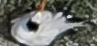

In [30]:
Image.fromarray(bird_images[0]['img'])

Text(0.5, 1.0, "[('ROTE', 'Royal Tern')]")

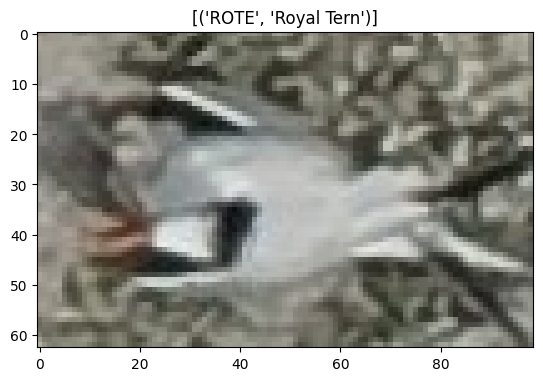

In [120]:
# Plot a random bird from the list
rdm_bird = random.sample(bird_images, 1)
plt.imshow(rdm_bird[0]['img'])
plt.title(str(rdm_bird[0]['mrk']))

### Data exploration

In [6]:
%cd data/terns

C:\Users\Christopher\Documents\Christopher\College hey\Rice\COMP 549 - Capstone\data\terns


In [23]:
import glob

# use glob to get all the csv files 
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
loop = False

# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    if loop == False:
        df = pd.read_csv(f)
        loop=True
    else:
        df = pd.concat([df, pd.read_csv(f)], axis=0)
df.reset_index(drop=True, inplace=True)
df

,filename,old_class,new_class,new_desc,xmin,ymin,xmax,ymax,mrk_X,mrk_Y
0,20220521 - Chester Island 10k-03-13_0,MTRNA,ROTE,Royal Tern,9213,9953,9307,10000,9251,9985
1,20220521 - Chester Island 10k-03-13_1,MTRNA,ROTE,Royal Tern,9420,9949,9501,10000,9457,9983
2,20220521 - Chester Island 10k-03-13_2,MTRNA,ROTE,Royal Tern,9074,9936,9165,10000,9111,9975
3,20220521 - Chester Island 10k-03-13_3,MTRNA,ROTE,Royal Tern,9326,9912,9417,9973,9370,9949
4,20220521 - Chester Island 10k-03-13_4,MTRNA,ROTE,Royal Tern,8836,9900,8917,9954,8875,9923
...,...,...,...,...,...,...,...,...,...,...
12871,20220521 - Chester Island 10k-05-13_795,MTRNA,ROTE,Royal Tern,526,1999,613,2074,572,2028
12872,20220521 - Chester Island 10k-05-13_796,MTRNA,ROTE,Royal Tern,631,3215,762,3280,708,3232
12873,20220521 - Chester Island 10k-05-13_797,MTRNF,ROTE,Royal Tern,607,3169,731,3352,708,3232
12874,20220521 - Chester Island 10k-05-13_798,MTRNA,ROTE,Royal Tern,4,3396,57,3464,24,3421


In [24]:
df.groupby('new_desc').nunique()

,filename,old_class,new_class,xmin,ymin,xmax,ymax,mrk_X,mrk_Y
new_desc,,,,,,,,,
Royal Tern,8070,4,1,5381,5431,5315,5424,5381,5442
Royal Tern no nest,158,2,1,152,156,152,157,155,157
Sandwich Tern Nesting,4505,3,1,3445,3551,3443,3590,3429,3585
Sandwich Tern non nesting,112,2,1,111,112,112,112,108,110
White-Faced Ibis,31,2,1,30,31,31,31,31,31


In [5]:
df = pd.read_csv('data/terns/20220521 - Chester Island 10k-03-14_labels.csv')
df.groupby('new_desc').nunique()

,filename,old_class,new_class,xmin,ymin,xmax,ymax,mrk_X,mrk_Y
new_desc,,,,,,,,,
Royal Tern,301,2,1,272,291,267,291,272,284
Royal Tern no nest,55,2,1,55,53,53,54,55,54
Sandwich Tern Nesting,97,1,1,94,97,86,97,87,96
Sandwich Tern non nesting,6,1,1,6,6,6,6,6,6


### Cut out birds in "Beach Terns"

In [9]:
DATA_PATH = 'data/beach terns/Beach Terns/'
NEW_DATA_PATH = 'data/beach terns/cuts/'
DATA_FILES = [file[:-4] for file in filter(lambda x: x.endswith('.JPG'), os.listdir(DATA_PATH))]

In [10]:
DATA_FILES

['DJI_20220521112941_0179',
 'DJI_20220521113138_0279',
 'DJI_20220521113419_0418',
 'DJI_20220521113836_0640']

In [26]:
# Collect all birds marked in bbx file
from PIL import Image 
from utils import plotting
from utils.cropping import csv_to_dict
import os
import random
import csv

all_bird_images = []
for file in DATA_FILES:
    print(file)
    annot_dict = csv_to_dict(csv_path = DATA_PATH + file + '.bbx', annot_file_ext='bbx')
    image_file = DATA_PATH + file + '.jpg'

    #Load the image
    image = np.asarray(Image.open(image_file))

    # Slice the image around each bounding box
    bird_images = []
    for bird in annot_dict['bbox']:
        img_dict = {}
        img_dict['bbx'] = [bird['xmin'], bird['ymin'],bird['xmax'], bird['ymax']]
        img_dict['orig_file'] = file
        img_dict['img'] = image[bird['ymin']:bird['ymax'], bird['xmin']:bird['xmax']]
        bird_images.append(img_dict)

    # Write data to a csv and save images to a local directory
    bird_images = list(bird_images)
    for i in range(len(bird_images)):
        img = Image.fromarray(bird_images[i]['img']).save(NEW_DATA_PATH + file + '_' + str(i) + '.jpg')
    all_bird_images.append(bird_images)
    
with open(NEW_DATA_PATH + 'beach_tern_labels.csv', mode='w', newline='') as annot:
    csv.writer(annot).writerow(['filename', 'xmin', 'ymin', 'xmax', 'ymax'])
    for bird_image in all_bird_images:
        for i in range(len(bird_image)):
            annot_writer = csv.writer(annot)
            annot_writer.writerow([bird_image[i]['orig_file'] + '_' + str(i),
                                   bird_image[i]['bbx'][0],
                                   bird_image[i]['bbx'][1],
                                   bird_image[i]['bbx'][2],
                                   bird_image[i]['bbx'][3]])
            

DJI_20220521112941_0179
DJI_20220521113138_0279
DJI_20220521113419_0418
DJI_20220521113836_0640


In [25]:
bird_image

[{'bbx': [7440, 1274, 7539, 1399],
  'orig_file': 'DJI_20220521113836_0640',
  'img': array([[[185, 181, 178],
          [180, 176, 173],
          [182, 178, 175],
          ...,
          [173, 167, 167],
          [172, 167, 164],
          [159, 154, 151]],
  
         [[184, 180, 177],
          [180, 176, 173],
          [183, 179, 176],
          ...,
          [165, 159, 159],
          [148, 142, 142],
          [140, 135, 132]],
  
         [[179, 175, 172],
          [178, 174, 171],
          [183, 179, 176],
          ...,
          [173, 167, 167],
          [134, 128, 128],
          [129, 124, 121]],
  
         ...,
  
         [[158, 154, 153],
          [149, 145, 144],
          [152, 148, 147],
          ...,
          [175, 166, 167],
          [182, 173, 174],
          [183, 177, 177]],
  
         [[149, 145, 144],
          [144, 140, 139],
          [152, 148, 147],
          ...,
          [176, 167, 168],
          [179, 170, 171],
          [181, 175, 175]

In [20]:
annot_dict

{'bbox': [{'class': 'MTRNA',
   'desc': 'Mixed Tern Adult',
   'xmin': 7440,
   'ymin': 1274,
   'xmax': 7539,
   'ymax': 1399},
  {'class': 'MTRNA',
   'desc': 'Mixed Tern Adult',
   'xmin': 7330,
   'ymin': 1192,
   'xmax': 7450,
   'ymax': 1290},
  {'class': 'MTRNA',
   'desc': 'Mixed Tern Adult',
   'xmin': 7271,
   'ymin': 1168,
   'xmax': 7360,
   'ymax': 1282},
  {'class': 'MTRNA',
   'desc': 'Mixed Tern Adult',
   'xmin': 7327,
   'ymin': 1074,
   'xmax': 7432,
   'ymax': 1182},
  {'class': 'MTRNA',
   'desc': 'Mixed Tern Adult',
   'xmin': 7282,
   'ymin': 990,
   'xmax': 7371,
   'ymax': 1083},
  {'class': 'MTRNA',
   'desc': 'Mixed Tern Adult',
   'xmin': 7224,
   'ymin': 1042,
   'xmax': 7336,
   'ymax': 1107},
  {'class': 'MTRNA',
   'desc': 'Mixed Tern Adult',
   'xmin': 7150,
   'ymin': 832,
   'xmax': 7264,
   'ymax': 924},
  {'class': 'MTRNA',
   'desc': 'Mixed Tern Adult',
   'xmin': 7071,
   'ymin': 859,
   'xmax': 7167,
   'ymax': 967},
  {'class': 'MTRNA',
   'desc